In [6]:
import pandas as pd
df= pd.read_csv('Task_5_Hit_Identification\shortlisted_hits.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50,MW,LogP,TPSA
0,CHEMBL3094348,CCNC(=O)Nc1nc2cc(-c3ccc(C(=O)O)nc3)cc(-c3ccccn...,9.000000,419.466,4.25990,117.10
1,CHEMBL3094347,CCNC(=O)Nc1nc2cc(-c3cccnc3)cc(-c3ccccn3)c2s1,7.853872,375.457,4.56170,79.80
2,CHEMBL515530,COC1CC(c2ccccc2)=NN1/C(C)=N\OC(=O)c1ccc(C(F)(F...,6.903090,405.376,4.27810,63.49
3,CHEMBL463832,CC1=NN2C(C1)c1ccccc1CC2(C)C,6.602060,214.312,3.14400,15.60
4,CHEMBL390983,COc1c(N2CC[C@@H](C3(N)CC3)C2)ccc2c(=O)c(C(=O)O...,6.078314,401.438,2.30880,97.79
...,...,...,...,...,...,...
309,CHEMBL3343206,CN(C)c1ccc(CCN2CCC(C(O)(c3ccccc3)c3ccccc3)CC2)cc1,0.477556,414.593,4.94320,26.71
310,CHEMBL3808620,O=C(Nc1ccc(N2CCCC(C(=O)O)C2)cc1)c1cc(Br)c(Br)[...,0.376751,471.149,4.09300,85.43
311,CHEMBL3342823,O=C(OO)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3cccc...,0.356547,475.585,4.77810,90.23
312,CHEMBL3342827,O=C(O)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc...,0.301030,459.586,4.84650,81.00


In [10]:
df.columns


Index(['molecule_chembl_id', 'canonical_smiles', 'pIC50', 'MW', 'LogP',
       'TPSA'],
      dtype='object')

In [12]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

df["mol"] = df["canonical_smiles"].apply(Chem.MolFromSmiles)

df["HBD"] = df["mol"].apply(Descriptors.NumHDonors)
df["HBA"] = df["mol"].apply(Descriptors.NumHAcceptors)
df["RotBonds"] = df["mol"].apply(Lipinski.NumRotatableBonds)

df = df.drop(columns="mol")
df

,molecule_chembl_id,canonical_smiles,pIC50,MW,LogP,TPSA,HBD,HBA,RotBonds
0,CHEMBL3094348,CCNC(=O)Nc1nc2cc(-c3ccc(C(=O)O)nc3)cc(-c3ccccn...,9.000000,419.466,4.25990,117.10,3,6,5
1,CHEMBL3094347,CCNC(=O)Nc1nc2cc(-c3cccnc3)cc(-c3ccccn3)c2s1,7.853872,375.457,4.56170,79.80,2,5,4
2,CHEMBL515530,COC1CC(c2ccccc2)=NN1/C(C)=N\OC(=O)c1ccc(C(F)(F...,6.903090,405.376,4.27810,63.49,0,5,4
3,CHEMBL463832,CC1=NN2C(C1)c1ccccc1CC2(C)C,6.602060,214.312,3.14400,15.60,0,2,0
4,CHEMBL390983,COc1c(N2CC[C@@H](C3(N)CC3)C2)ccc2c(=O)c(C(=O)O...,6.078314,401.438,2.30880,97.79,2,6,5
...,...,...,...,...,...,...,...,...,...
309,CHEMBL3343206,CN(C)c1ccc(CCN2CCC(C(O)(c3ccccc3)c3ccccc3)CC2)cc1,0.477556,414.593,4.94320,26.71,1,3,7
310,CHEMBL3808620,O=C(Nc1ccc(N2CCCC(C(=O)O)C2)cc1)c1cc(Br)c(Br)[...,0.376751,471.149,4.09300,85.43,3,3,4
311,CHEMBL3342823,O=C(OO)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3cccc...,0.356547,475.585,4.77810,90.23,3,6,9
312,CHEMBL3342827,O=C(O)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc...,0.301030,459.586,4.84650,81.00,3,4,9


Prepare ML dataset

In [13]:
from sklearn.model_selection import train_test_split

features = ["MW","LogP","TPSA","HBD","HBA","RotBonds"]

X = df[features]
y = df["pIC50"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (314, 6)
y shape: (314,)


In [29]:
from rdkit.Chem.Scaffolds import MurckoScaffold

def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return MurckoScaffold.MurckoScaffoldSmiles(mol=mol)

df["scaffold"] = df["canonical_smiles"].apply(get_scaffold)

scaffolds = df["scaffold"].unique()

train_scaffolds = scaffolds[:int(0.8*len(scaffolds))]
test_scaffolds = scaffolds[int(0.8*len(scaffolds)):]

train = df[df["scaffold"].isin(train_scaffolds)]
test = df[df["scaffold"].isin(test_scaffolds)]


Train Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)


RMSE: 1.067587317526931
R2: 0.3175155128236311


Feature Importance (Interpretability)

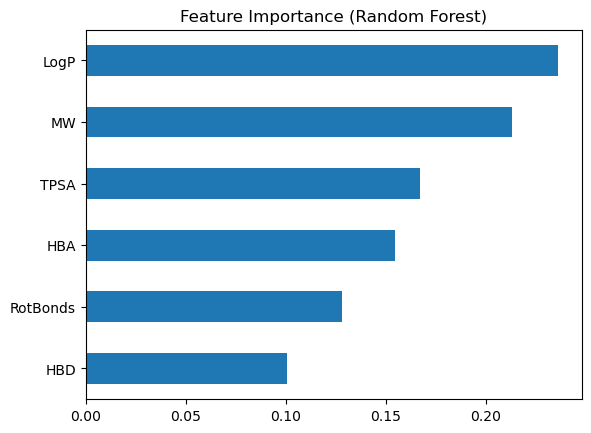

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(rf.feature_importances_, index=features)
importance.sort_values().plot(kind="barh")
plt.title("Feature Importance (Random Forest)")
plt.show()


Convert to Classification + ROC


In [32]:
df["active"] = (df["pIC50"] >= 6).astype(int)
y_class = df["active"]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

probs = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, probs)

print("ROC-AUC:", auc)


ROC-AUC: 0.6475409836065573


Plot ROC Curve

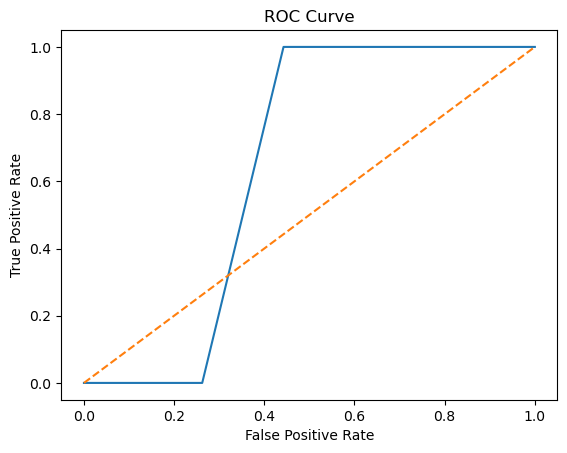

In [35]:
fpr, tpr, _ = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


AI Hit Scoring


In [36]:
df["predicted_pIC50"] = rf.predict(X)

df_ml_ranked = df.sort_values("predicted_pIC50", ascending=False)

df_ml_ranked.head(10)


,molecule_chembl_id,canonical_smiles,pIC50,MW,LogP,TPSA,HBD,HBA,RotBonds,active,predicted_pIC50,scaffold
0,CHEMBL3094348,CCNC(=O)Nc1nc2cc(-c3ccc(C(=O)O)nc3)cc(-c3ccccn...,9.000000,419.466,4.2599,117.10,3,6,5,1,6.736974,c1ccc(-c2cc(-c3cccnc3)cc3ncsc23)nc1
2,CHEMBL515530,COC1CC(c2ccccc2)=NN1/C(C)=N\OC(=O)c1ccc(C(F)(F...,6.903090,405.376,4.2781,63.49,0,5,4,1,6.298573,O=C(ON=CN1CCC(c2ccccc2)=N1)c1ccccc1
1,CHEMBL3094347,CCNC(=O)Nc1nc2cc(-c3cccnc3)cc(-c3ccccn3)c2s1,7.853872,375.457,4.5617,79.80,2,5,4,1,6.137968,c1ccc(-c2cc(-c3cccnc3)cc3ncsc23)nc1
13,CHEMBL4126667,COc1c(Br)c(OC)c2c(c1C(C)=O)OC(C)(C)C(OC)C2Br,5.730487,452.139,4.2909,53.99,0,5,4,0,5.751913,c1ccc2c(c1)CCCO2
12,CHEMBL4126781,COc1c(Cl)c(OC)c2c(c1C(C)=O)OC(C)(C)C(OC)C2Cl,5.730487,363.237,4.0257,53.99,0,5,4,0,5.522095,c1ccc2c(c1)CCCO2
4,CHEMBL390983,COc1c(N2CC[C@@H](C3(N)CC3)C2)ccc2c(=O)c(C(=O)O...,6.078314,401.438,2.3088,97.79,2,6,5,1,5.418774,O=c1ccn(C2CC2)c2cc(N3CCC(C4CC4)C3)ccc12
16,CHEMBL4129934,COc1cc(OS(=O)(=O)C(F)(F)F)c2c(c1C(C)=O)OC(C)(C...,5.602060,380.340,3.3104,78.90,0,6,4,0,5.312410,C1=Cc2ccccc2OC1
10,CHEMBL4127930,COc1cc(OC)c2c(c1C(C)=O)OC(C)(C)C(O)C2Br,5.730487,359.216,2.8743,64.99,1,5,3,0,5.270255,c1ccc2c(c1)CCCO2
14,CHEMBL4129139,COc1cc2c(c(OC)c1C(C)=O)[C@H](O)[C@H](O)C(C)(C)O2,5.730487,296.319,1.4717,85.22,2,6,3,0,5.247469,c1ccc2c(c1)CCCO2
15,CHEMBL4128711,COc1cc(OC)c2c(c1C(C)=O)OC(C)(C)[C@@H](O)[C@H]2O,5.730487,296.319,1.4717,85.22,2,6,3,0,5.247469,c1ccc2c(c1)CCCO2


Morgan Fingerprint

In [37]:
from rdkit.Chem import AllChem
import numpy as np

def morgan_fp(smiles, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=nBits)
    return np.array(fp)

fps = np.array(df["canonical_smiles"].apply(morgan_fp).tolist())


In [38]:
X_fp = fps


In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring="neg_root_mean_squared_error")
print("CV RMSE:", -scores.mean())


CV RMSE: 1.5085047237129992


In [40]:
! pip install shap


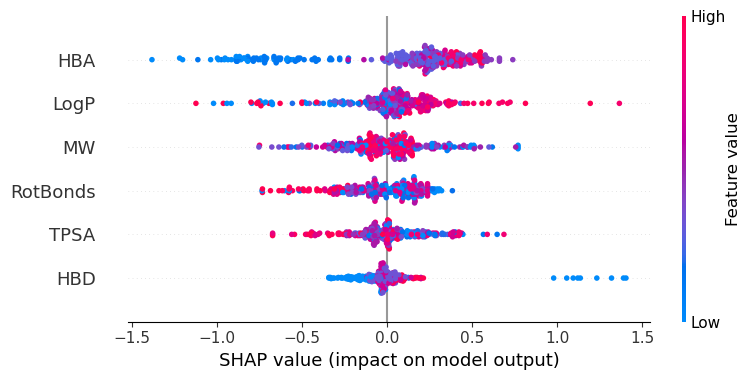

In [41]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)


UMAP- Chemical Space Visualization


In [42]:
! pip install umap-learn


c:\Users\saman\miniconda3\envs\bioenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


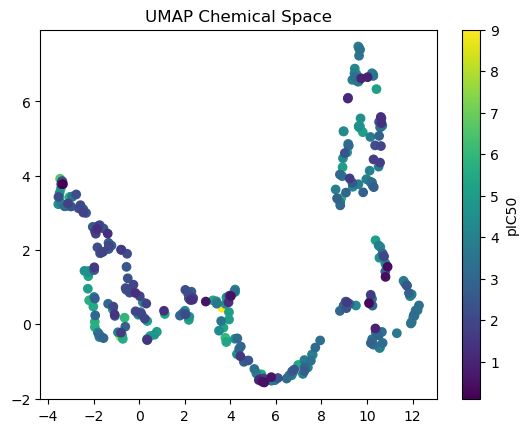

In [43]:
import umap

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

plt.scatter(embedding[:,0], embedding[:,1], c=df["pIC50"])
plt.colorbar(label="pIC50")
plt.title("UMAP Chemical Space")
plt.show()


In [44]:
import plotly.express as px

umap_df = df.copy()
umap_df["UMAP1"] = embedding[:,0]
umap_df["UMAP2"] = embedding[:,1]

fig = px.scatter(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    color="pIC50",
    hover_data=["molecule_chembl_id", "pIC50", "MW", "LogP", "TPSA"],
    title="Interactive UMAP Chemical Space (colored by pIC50)",
    color_continuous_scale="Viridis"
)

fig.show()


In [45]:
top_hits = umap_df.sort_values("pIC50", ascending=False).head(10)

fig.add_scatter(
    x=top_hits["UMAP1"],
    y=top_hits["UMAP2"],
    mode="markers",
    marker=dict(size=12, symbol="x"),
    name="Top Hits"
)

fig.show()
